**IMPORTS**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sql-injection-dataset/sqliv2.csv
/kaggle/input/sql-injection-dataset/sqli.csv
/kaggle/input/sql-injection-dataset/SQLiV3.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn import tree
from tensorflow.keras import models, layers
import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support
import seaborn as sns
warnings.filterwarnings('ignore')

**LOADING AND PREPROCESSING DATASET**

In [3]:
path = '../input/sql-injection-dataset/'
df = pd.read_csv(path + "sqli.csv", encoding='utf-16')
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (4200, 2)


,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


In [4]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)
print("Dataset Input:", "\n", X.head(5))
print("Dataset Label:", "\n", y.head(5))

(4200,) (4200,)
Dataset Input: 
 0                  a
1                a' 
2              a' --
3    a' or 1 = 1; --
4                  @
Name: Sentence, dtype: object
Dataset Label: 
 0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64


In [5]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3360, 4717)
(3360,)
(840, 4717)
(840,)


In [7]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}

**LOGISTIC REGRESSION**

In [8]:
lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

Accuracy of Logistic Regression on test set : 0.9261904761904762
F1 Score of Logistic Regression on test set : 0.8315217391304348


**RANDOM FOREST**

In [9]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)

Accuracy of Random Forest on test set : 0.9023809523809524
F1 Score of Random Forest on test set : 0.8379446640316206


**SUPPORT VECTOR MACHINES**

In [10]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)

Accuracy of SVM on test set : 0.7976190476190477
F1 Score of SVM on test set : 0.3359375


**NAIVE BAYES**

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.9797619047619047
F1 Score of Naive Bayes on test set : 0.961451247165533


DECISION TREES


In [12]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)

Accuracy of Naive Bayes on test set : 0.844047619047619
F1 Score of Naive Bayes on test set : 0.7639639639639639


**CONVOLUTIONAL NEURAL NETWORK**

In [13]:
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))

2022-09-22 13:16:35.976352: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 32)             150976    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 32)             1056      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 152,065
Trainable params: 152,065
Non-trainable params: 0
_________________________________________________________________


2022-09-22 13:16:36.273850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
105/105 [==============================] - 1s 7ms/step - loss: 0.4141 - accuracy: 0.8488 - val_loss: 0.1858 - val_accuracy: 0.9095
Epoch 2/10
105/105 [==============================] - 1s 12ms/step - loss: 0.1166 - accuracy: 0.9604 - val_loss: 0.0935 - val_accuracy: 0.9786
Epoch 3/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0654 - accuracy: 0.9807 - val_loss: 0.0756 - val_accuracy: 0.9762
Epoch 4/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9818 - val_loss: 0.0702 - val_accuracy: 0.9750
Epoch 5/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0479 - accuracy: 0.9818 - val_loss: 0.0701 - val_accuracy: 0.9738
Epoch 6/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0459 - accuracy: 0.9821 - val_loss: 0.0672 - val_accuracy: 0.9750
Epoch 7/10
105/105 [==============================] - 1s 5ms/step - loss: 0.0448 - accuracy: 0.9821 - val_loss: 0.0673 - val_accuracy: 0.9762
Epoch

In [15]:
y_pred = model.predict(X_test1).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, y_test)}")

# Updates model score to f1_dict
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)

Accuracy of CNN on test set : 0.9726190476190476
F1 Score of CNN on test set : 0.9485458612975392


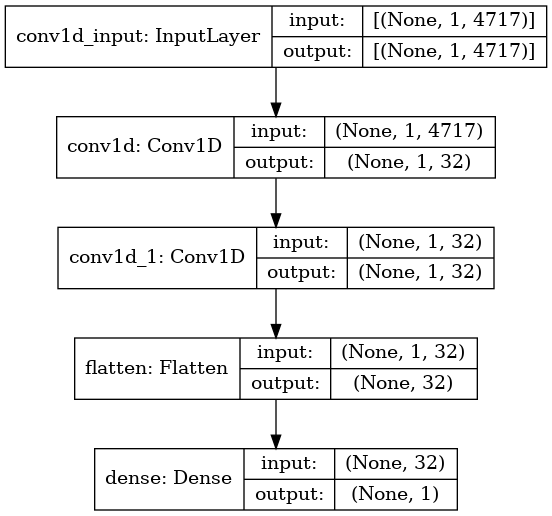

In [16]:
plot_model(model, show_shapes=True, to_file='CNN.png')

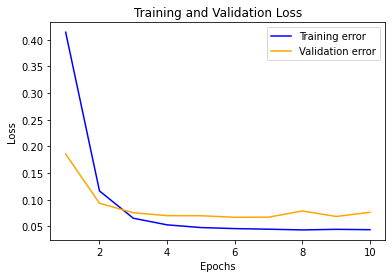

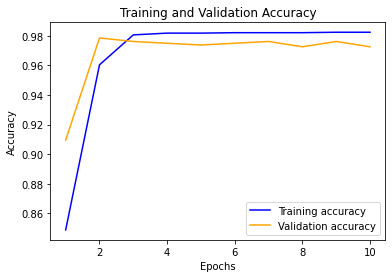

In [17]:
# Plots loss over epochs
plot_history(history)
plot_historyAcc(history)

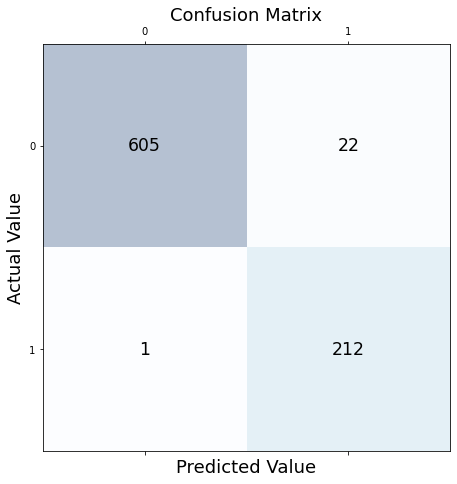

               precision    recall  f1-score   support

Non-Intrusion       1.00      0.96      0.98       627
    Intrusion       0.91      1.00      0.95       213

     accuracy                           0.97       840
    macro avg       0.95      0.98      0.96       840
 weighted avg       0.97      0.97      0.97       840



In [18]:
# Plots confusion matrix and displays classification report
conf_matrix_model = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_model)
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

FINAL PLOT FOR MODELS PERFORMANCE

In [19]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
data

,LogisticRegression,RandomForest,SVM,NaiveBayes,DecisionTree,CNN
F1_Score,0.831522,0.837945,0.335938,0.961451,0.763964,0.948546
Precision,0.718310,0.995305,0.201878,0.995305,0.995305,0.995305
Recall,0.987097,0.723549,1.000000,0.929825,0.619883,0.905983
Accuracy,0.926190,0.902381,0.797619,0.979762,0.844048,0.972619


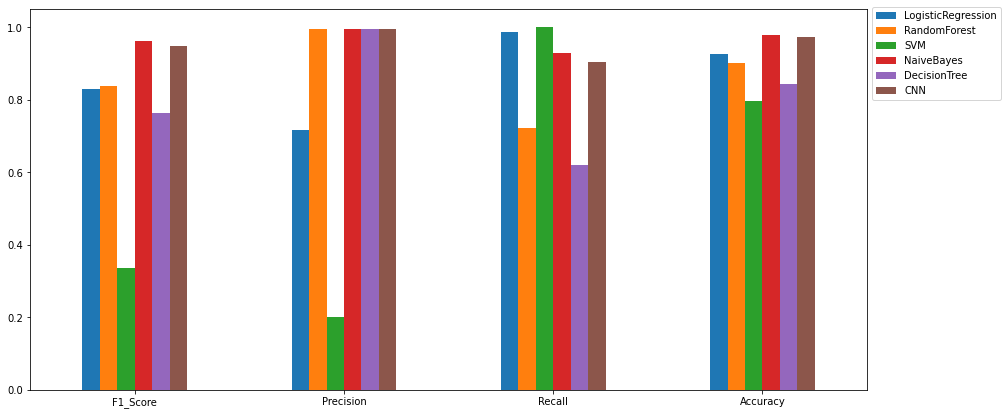

In [20]:
result = data.plot(kind='bar', rot=0, figsize=(15, 7));
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');